In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime as dt
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Accidents = pd.read_csv('/content/drive/MyDrive/Accidents0515.csv',index_col='Accident_Index')
Casualities = pd.read_csv('/content/drive/MyDrive/Casualties0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
Vehicles = pd.read_csv('/content/drive/MyDrive/Vehicles0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [58]:
df = pd.merge(Vehicles, Accidents, how = 'inner', on = 'Accident_Index')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 52 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Vehicle_Reference                            int64  
 1   Vehicle_Type                                 int64  
 2   Towing_and_Articulation                      int64  
 3   Vehicle_Manoeuvre                            int64  
 4   Vehicle_Location-Restricted_Lane             int64  
 5   Junction_Location                            int64  
 6   Skidding_and_Overturning                     int64  
 7   Hit_Object_in_Carriageway                    int64  
 8   Vehicle_Leaving_Carriageway                  int64  
 9   Hit_Object_off_Carriageway                   int64  
 10  1st_Point_of_Impact                          int64  
 11  Was_Vehicle_Left_Hand_Drive?                 int64  
 12  Journey_Purpose_of_Driver                    int64  
 13 

In [65]:
selected_features = df[['Accident_Severity','Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit','Number_of_Vehicles','Number_of_Casualties']]
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 13 columns):
 #   Column                                       Dtype
---  ------                                       -----
 0   Accident_Severity                            int64
 1   Did_Police_Officer_Attend_Scene_of_Accident  int64
 2   Age_of_Driver                                int64
 3   Vehicle_Type                                 int64
 4   Age_of_Vehicle                               int64
 5   Engine_Capacity_(CC)                         int64
 6   Weather_Conditions                           int64
 7   Road_Surface_Conditions                      int64
 8   Light_Conditions                             int64
 9   Sex_of_Driver                                int64
 10  Speed_limit                                  int64
 11  Number_of_Vehicles                           int64
 12  Number_of_Casualties                         int64
dtypes: int64(13)
memory usage: 32

In [66]:
feature=selected_features[selected_features['Did_Police_Officer_Attend_Scene_of_Accident'] != -1]
feature=feature[feature['Did_Police_Officer_Attend_Scene_of_Accident'] != -1]
feature=feature[feature['Weather_Conditions'] != -1]
feature=feature[feature['Sex_of_Driver'] != -1]

selected_features = feature
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3003597 entries, 200501BS00001 to 2014984139614
Data columns (total 13 columns):
 #   Column                                       Dtype
---  ------                                       -----
 0   Accident_Severity                            int64
 1   Did_Police_Officer_Attend_Scene_of_Accident  int64
 2   Age_of_Driver                                int64
 3   Vehicle_Type                                 int64
 4   Age_of_Vehicle                               int64
 5   Engine_Capacity_(CC)                         int64
 6   Weather_Conditions                           int64
 7   Road_Surface_Conditions                      int64
 8   Light_Conditions                             int64
 9   Sex_of_Driver                                int64
 10  Speed_limit                                  int64
 11  Number_of_Vehicles                           int64
 12  Number_of_Casualties                         int64
dtypes: int64(13)
memory usage: 32

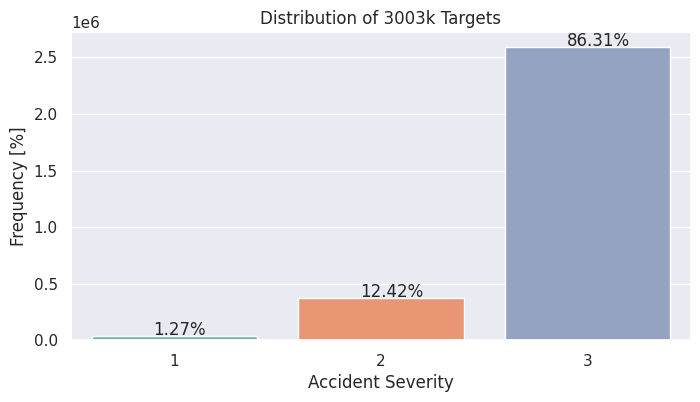

In [67]:
ax = sns.countplot(x = selected_features.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(selected_features.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of 3003k Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

In [68]:
# Creating weights that are opposite to the weights of target
weights = np.where(selected_features['Accident_Severity'] == 3, .2, .8)
selected_features_balanced = selected_features.sample(frac=0.4, replace=True, weights=weights)
print(selected_features_balanced.shape)

(1201439, 13)


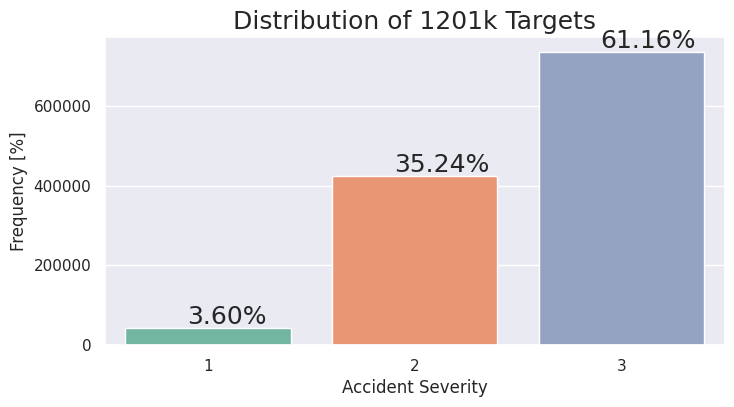

In [69]:
#Distribution of sample data by targets

ax = sns.countplot(x = selected_features_balanced.Accident_Severity ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(selected_features_balanced.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of 1201k Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

In [71]:
selected_features_balanced.to_csv('data.csv')

In [ ]:
selected_targets = selected_features_balanced[['Accident_Severity']]
selected_features_final=selected_features_balanced.drop(['Accident_Severity'], axis=1)
selected_targets.shape


# Split the data into a training and test set.
X_train, X_test, y_train, y_test = split(selected_features_final.values, 
                                              selected_targets.values,test_size=0.10, random_state=99)
X_train.shape

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)



cm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

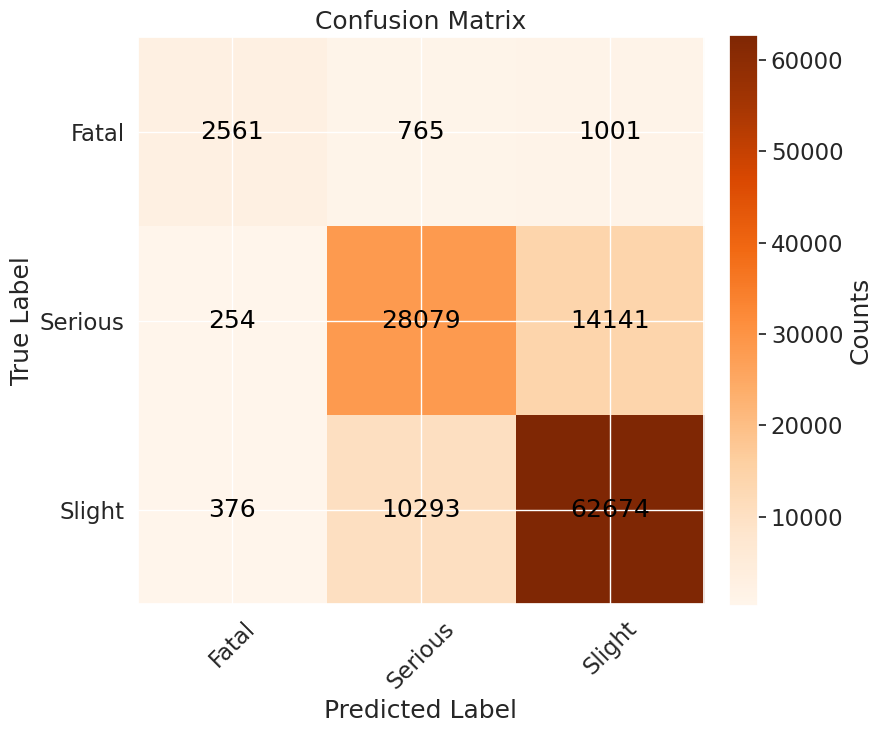